※본 커널은 캐글을 통해 공유된 "VinBigData Chest X-ray Abnormalities Detection"(https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection) Competition 의 Notebooks 중

"Visual In-Depth EDA – VinBigData Competition Data"(https://www.kaggle.com/dschettler8845/visual-in-depth-eda-vinbigdata-competition-data) 의 내용을 기반으로 작성되었습니다.

<h1 style="text-align: center; font-family: Verdana; font-size: 32px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; font-variant: small-caps; letter-spacing: 3px; color: #7b4f88; background-color: #ffffff;">VinBigData Chest X-ray Abnormalities Detection</h1>
<h2 style="text-align: center; font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: underline; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">Exploratory Data Analysis (EDA)</h2>
<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">CREATED BY: DARIEN SCHETTLER</h5>


<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;">TABLE OF CONTENTS</h2>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#background_information">1&nbsp;&nbsp;&nbsp;&nbsp;BACKGROUND INFORMATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#setup">2&nbsp;&nbsp;&nbsp;&nbsp;SETUP</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#helper_functions">3&nbsp;&nbsp;&nbsp;&nbsp;HELPER FUNCTIONS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#tabular_data">4&nbsp;&nbsp;&nbsp;&nbsp;TABULAR DATA</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#image_data">5&nbsp;&nbsp;&nbsp;&nbsp;IMAGE DATA</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#combining_annotations">6&nbsp;&nbsp;&nbsp;&nbsp;COMBINING ANNOTATIONS</a></h3>

---


#<a style="text-align: font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;" id="imports">0&nbsp;&nbsp;IMPORTS</a>

**# PIP Installs**

In [ ]:
!/opt/conda/bin/python3.7 -m pip install -q --upgrade pip      # Upgrade PIP

In [ ]:
!pip install -q pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg # Install/Upgrade PyDicom Dependencies

**# Imports**

In [ ]:
# Machine Learning and Data Science Imports
import tensorflow_probability as tfp
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
import tensorflow_hub as hub
from skimage import exposure
import pandas as pd; pd.options.mode.chained_assignment = None
import numpy as np
import scipy

# Built In Imports
from datetime import datetime
from glob import glob
import warnings
import IPython
import urllib
import zipfile
import pickle
import shutil
import string
import math
import tqdm
import time
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib
import plotly
import PIL
import cv2

# PRESETS
FIG_FONT = dict(family="Helvetica, Arial", size=14, color="#7f7f7f")
LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", 15)]
LABEL_COLORS_WOUT_NO_FINDING = LABEL_COLORS[:8]+LABEL_COLORS[9:]

# Other Imports
from pydicom.pixel_data_handlers.util import apply_voi_lut
from tqdm.notebook import tqdm
import pydicom

print("\n... IMPORTS COMPLETE ...\n")


... IMPORTS COMPLETE ...



#<a style="text-align: font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="background_information">1&nbsp;&nbsp;BACKGROUND INFORMATION</a>

##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">1.1  THE DATA</h3>

<b style="text-decoration: underline; font-family: Verdana;">BACKGROUND INFORMATION</b>

이 대회에서, 우리는 일반적인 흉부 폐 질환(common thoracic lung diseases)을 분류(classifying)하고 중요한 결과의 위치를 특정합니다. <br> **이것은 객체 감지(object detection) 및 분류(classification) 문제입니다.**

각 테스트 이미지에 대해 모든 결과에 대한 경계 상자와 클래스를 예측합니다. 결과가 없다고 예측하는 경우 **`14 1 0 0 1 1`** * (14는 결과 없음에 대한 클래스 ID이며 신뢰도가 1.0인 1 픽셀 경계 상자를 제공합니다.) *

이미지는 **DICOM** 형식이므로 시각화 및 분류에 유용한 추가 데이터가 포함되어 있습니다.

![Example Radiographs](https://i.imgur.com/QWmbhXx.png)

<br>

<!--
<b style="text-decoration: underline; font-family: Verdana;">BACKGROUND INFORMATION</b>

In this competition, we are classifying common thoracic lung diseases and localizing critical findings. <br>**This is an object detection and classification problem.**

For each test image, you will be predicting a bounding box and class for all findings. If you predict that there are no findings, you should create a prediction of **`14 1 0 0 1 1`** *(14 is the class ID for no finding, and this provides a one-pixel bounding box with a confidence of 1.0)*

Note that the images are in **DICOM** format, which means they contain additional data that might be useful for visualizing and classifying.

![Example Radiographs](https://i.imgur.com/QWmbhXx.png)

<br>
-->


<b style="text-decoration: underline; font-family: Verdana;">DATASET INFORMATION</b>

데이터 세트는 DICOM 형식의 **`18,000`** 후방-전방(postero-anterior) (PA) CXR 스캔으로 구성되며, 환자의 개인 정보를 보호하기 위해 익명화되었습니다.

모든 이미지는 경험이 풍부한 방사선 전문의 패널에 의해 아래 나열된 **14**유형의 중요한 방사선 결과(critical radiographic findings)가 있는지에 대해 레이블을 지정했습니다.

**`0`** - 대동맥 비대(Aortic enlargement) <br>
**`1`** - 무기폐(Atelectasis) <br>
**`2`** - 석회화(Calcification) <br>
**`3`** - 심장 비대증(Cardiomegaly) <br>
**`4`** - 통합(Consolidation) <br>
**`5`** - 간질성 폐 질환(ILD) <br>
**`6`** - 침투(Infiltration) <br>
**`7`** - 폐 불투명도(Lung Opacity) <br>
**`8`** - 결절(Nodule) / 종괴(Mass) <br>
**`9`** - 기타 병변(Other lesion) <br>
**`10`** - 흉막 삼출(Pleural effusion) <br>
**`11`** - 흉막 비후(Pleural thickening) <br>
**`12`** - 기흉(Pneumothorax) <br>
**`13`** - 폐 섬유증(Pulmonary fibrosis) <br>
**`14`** - "결과 없음"("No finding") 은 위의 모든 결과를 찾을 수 없음을 위한 것입니다.

이 경쟁의 핵심 부분은 여러 방사선 전문의들이 만든 ground-truth 를 사용하는 것입니다. 즉, 동일한 이미지에 여러 방사선 전문의가 주석을 달아 여러개의 ground-truth 레이블이 있습니다.

<br>

<!--
<b style="text-decoration: underline; font-family: Verdana;">DATASET INFORMATION</b>

The dataset comprises **`18,000`** postero-anterior (PA) CXR scans in DICOM format, which were de-identified to protect patient privacy. 

All images were labeled by a panel of experienced radiologists for the presence of **14** critical radiographic findings as listed below:

> **`0`** - Aortic enlargement <br>
**`1`** - Atelectasis <br>
**`2`** - Calcification <br>
**`3`** - Cardiomegaly <br>
**`4`** - Consolidation <br>
**`5`** - ILD <br>
**`6`** - Infiltration <br>
**`7`** - Lung Opacity <br>
**`8`** - Nodule/Mass <br>
**`9`** - Other lesion <br>
**`10`** - Pleural effusion <br>
**`11`** - Pleural thickening <br>
**`12`** - Pneumothorax <br>
**`13`** - Pulmonary fibrosis <br>
**`14`** - "No finding" observation was intended to capture the absence of all findings above

Note that a key part of this competition is working with ground truth from multiple radiologists. That means that the same image will have multiple ground-truth labels as annotated by different radiologists.

<br>

-->


<b style="text-decoration: underline; font-family: Verdana;">DATA FILES</b>

**`train.csv`**-클래스 및 경계 상자를 포함하여 각 객체에 대해 하나의 행이 있는 train set metadata (이미지 당 여러 행 가능) <br>
**`sample_submission.csv`**-올바른 형식의 sample submission 파일

<br>
<!--
<b style="text-decoration: underline; font-family: Verdana;">DATA FILES</b>
> **`train.csv`** - the train set metadata, with one row for each object, including a class and a bounding box (multiple rows per image possible)<br>
**`sample_submission.csv`** - a sample submission file in the correct format

<br>
-->



<b style="text-decoration: underline; font-family: Verdana;">TRAIN COLUMNS</b>
> **`image_id`** - 고유한 이미지 식별자 <br>
**`class_name`** - 감지된 객체의 클래스 이름 (또는 "No finding") <br>
**`class_id`** - 감지된 객체의 클래스 ID <br>
**`rad_id`** - 관찰한 방사선 전문의의 ID <br>
**`x_min`** - 개체 경계 상자의 최소 X 좌표 <br>
**`y_min`** - 개체 경계 상자의 최소 Y 좌표 <br>
**`x_max`** - 개체 경계 상자의 최대 X 좌표 <br>
**`y_max`** - 개체 경계 상자의 최대 Y 좌표
<!--
<b style="text-decoration: underline; font-family: Verdana;">TRAIN COLUMNS</b>
> **`image_id`** - unique image identifier<br>
**`class_name`** - the name of the class of detected object (or "No finding")<br>
**`class_id`** - the ID of the class of detected object<br>
**`rad_id`** - the ID of the radiologist that made the observation<br>
**`x_min`** - minimum X coordinate of the object's bounding box<br>
**`y_min`** - minimum Y coordinate of the object's bounding box<br>
**`x_max`** - maximum X coordinate of the object's bounding box<br>
**`y_max`** - maximum Y coordinate of the object's bounding box
-->


##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">1.2  THE GOAL</h3>


이 대회에서는 흉부 방사선 사진에서 **`14`** 유형의 흉부 이상(thoracic abnormalities )을 자동으로 위치지정(localize)하고 분류(classify)합니다. 숙련된 방사선 전문의가 주석을 추가한 **`18,000`** 개 스캔으로 구성된 데이터 세트로 작업하게 됩니다. **`15,000`** 개의 독립적으로 라벨이 지정된 이미지로 모델을 학습시킬 수 있으며 **`3,000`** 개 이미지의 테스트 세트에서 평가됩니다. 이러한 주석은 VinBigData의 웹 기반 플랫폼인 VinLab을 통해 수집되었습니다. 데이터 세트 구축에 대한 자세한 내용은 최근 논문 "VinDr-CXR : 방사선 전문의의 주석이 포함된 개방형 흉부 X- 레이 데이터 세트"에서 찾을 수 있습니다.

<!--
In this competition, you’ll automatically localize and classify **`14`** types of thoracic abnormalities from chest radiographs. You'll work with a dataset consisting of **`18,000`** scans that have been annotated by experienced radiologists. You can train your model with **`15,000`** independently-labeled images and will be evaluated on a test set of **`3,000`** images. These annotations were collected via VinBigData's web-based platform, VinLab. Details on building the dataset can be found in our recent paper “VinDr-CXR: An open dataset of chest X-rays with radiologist's annotations”.
-->


##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">1.3  ADDITIONAL INFORMATION ON ABNORMALITIES</h3>


<p style="font-size: 10px; color: red; font-weight: bold; font-family: Verdana; text-transform: uppercase;">이 마크 다운 셀에 대한 대부분의 콘텐츠는 재능있는 <a href="https://www.kaggle.com/sakuraandblackcat">ANZ</a>가 작성한 <a href="https://www.kaggle.com/sakuraandblackcat/chest-x-ray-knowledges-for-the-14-abnormalities">노트북</a>에서 가져옵니다. </p>

<!--
<p style="font-size: 10px; color: red; font-weight: bold; font-family: Verdana; text-transform: uppercase;">Much Of The Content For This Markdown Cell Comes From <a href="https://www.kaggle.com/sakuraandblackcat/chest-x-ray-knowledges-for-the-14-abnormalities">This Notebook</a> Written By The Talented <a href="https://www.kaggle.com/sakuraandblackcat">User ANZ</a></p>
-->



<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">대동맥 비대(Aortic enlargement)</b>
* 대동맥 비대는 대 동맥류의 징후로 알려져 있습니다. 이 상태는 종종 상행 대동맥(ascending aorta)에서 발생합니다.
* 일반적으로 동맥류라는 용어는 축 지름이 상행 대동맥(ascending aorta)의 경우 > 5.0 cm이고 하행 대동맥(descending aorta)의 경우 > 4.0 cm 일 때 사용됩니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Aortic enlargement</b>
* Aortic enlargement is known as a sign of an aortic aneurysm. This condition often occurs in the ascending aorta. 
* In general, the term aneurysm is used when the axial diameter is >5.0 cm for the ascending aorta and >4.0 cm for the descending aorta.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">무기폐(Atelectasis)</b>
* 무기폐는 폐의 일부 또는 전부에 공기가 없어서 허탈된(collaped) 상태입니다.
* 무기폐의 일반적인 원인은 기관지 막힘입니다.
* 무기폐의 경우 흉부 X- 레이에서 밀도가 증가합니다 (일반적으로 더 흰색, 흑백 반전 이미지에서 검은 색).

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Atelectasis</b>
* Atelectasis is a condition where there is no air in part or all of the lungs and they have collapsed. 
* A common cause of atelectasis is obstruction of the bronchi.
* In atelectasis, there is an increase in density on chest x-ray (usually whiter; black on black-and-white inversion images).
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">석회화(Calcification)</b>
* 칼슘 (석회화)은 폐 또는 흉막의 이전 염증이 치유된 부위에 침착될 수 있습니다.
* 많은 질병이나 상태가 흉부 X-ray에서 석회화를 일으킬 수 있습니다.
* 석회화는 대동맥 (죽상 동맥 경화증과 마찬가지로)에서 발생하거나 종격동 림프절 (이전 감염, 결핵 또는 히스토 플라스마 증과 마찬가지로)에서 발생할 수 있습니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Calcification</b>
* Calcium (calcification) may be deposited in areas where previous inflammation of the lungs or pleura has healed. 
* Many diseases or conditions can cause calcification on chest x-ray. 
* Calcification may occur in the Aorta (as with atherosclerosis) or it may occur in mediastinal lymph nodes (as with previous infection, tuberculosis, or histoplasmosis).
-->



<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">심장 비대증(Cardiomegaly)</b>
* 심장 비대증은 일반적으로 심장 너비와 가슴 너비의 비율이 50 % 이상일 때 진단됩니다. 이 진단 기준은 이 대회의 필수 기반이 될 수 있습니다.
* 심장 비대증은 고혈압, 관상 동맥 질환, 감염, 유전 질환 및 심근 병증을 비롯한 여러 질환으로 인해 발생할 수 있습니다.
* 심장 비대증 진단을 위한 심폐 비율 기준은 0.5보다 큰 비율입니다. 그러나 이것은 환자가 서 있는 동안 XRay를 수행하는 경우에만 유효합니다. 환자가 앉아 있거나 침대에 있는 경우이 기준을 사용할 수 없습니다. 환자가 앉아 있는지 또는 서 있는지 (결과적으로 이 기준이 유효한지 여부)를 확인하기 위해 위장에 공기가 있는지 감지합니다 (공기가 없는 경우 환자는 서 있지 않고 기준을 사용할 수 없음).

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Cardiomegaly</b>
* Cardiomegaly is usually diagnosed when the ratio of the heart's width to the width of the chest is more than 50%. This diagnostic criterion may be an essential basis for this competition.
* Cardiomegaly can be caused by many conditions, including hypertension, coronary artery disease, infections, inherited disorders, and cardiomyopathies.
* The heart-to-lung ratio criterion for the diagnosis of cardiomegaly is a ratio of greater than 0.5. However, this is only valid if the XRay is performed while the patient is standing. If the patient is sitting or in bed, this criterion cannot be used. To determine whether a patient is sitting or standing (and consequently whether this criteron is valid), we will detect the presence of air in the stomach (if there is no air in it, the patient is not standing and the criterion cannot be used)
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">통합(Consolidation)</b>
* 통합은 폐포의 공기 함유 공간을 대체하는 체액, 세포 또는 조직의 침투로 인한 폐 투과성의 감소입니다.
* 통합은 공식적으로 공역 통합(air space consolidation)이라고 합니다.
* X-ray 촬영시 공기층의 밀도가 높아지고 폐 혈관은 보이지 않지만 흰색 바탕에 검은 기관지가 보이는데 <i> "air bronchogram"</ i>이라고합니다. . 공기가 기관지에 남아 있기 때문에 X-ray를 흡수하지 않고 검은색으로 보이며 정상적인 폐장에서 흑백이 반전됩니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Consolidation</b>
* Consolidation is a decrease in lung permeability due to infiltration of fluid, cells, or tissue replacing the air-containing spaces in the alveoli.
* Consolidation is officially referred to as air space consolidation. 
* On X-rays displaying air space consolidation, the lung field's density is increased, and pulmonary blood vessels are not seen, but black bronchi can be seen in the white background, which is called <i>"air bronchogram"</i>. Since air remains in the bronchial tubes, they do not absorb X-rays and appear black, and the black and white are reversed from normal lung fields.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">간질성 폐 질환(ILD)</b>
* ILD는 <i> "간질성 폐 질환"</i>을 의미합니다.
* 간질성(Interstitial) 폐 질환은 틈새(Interstitial) 공간이 손상되는 여러 질환의 일반적인 용어입니다.
* 틈새 공간은 폐포의 벽 (폐의 공기 주머니)과 혈관 주변 공간 및 작은 기도를 의미합니다.
* 흉부 방사선 촬영 결과에는 지상 유리 불투명도 (즉, 흐릿한 불투명 영역), 선형 망상 그림자 및 세분화 된 그림자가 포함됩니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">ILD</b>
* ILD stands for <i>"Interstitial Lung Disease"</i>.
* Interstitial Lung Disease is a general term for many conditions in which the interstitial space is injured. 
* The interstitial space refers to the walls of the alveoli (air sacs in the lungs) and the space around the blood vessels and small airways.
* Chest radiographic findings include ground-glass opacities (i.e., an area of hazy opacification), linear reticular shadows, and granular shadows.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">침투(Infiltration)</b>
* 일부 유체 성분이 폐포로 침투하면 침윤성 그림자 (침투)가 발생합니다.
* 통합과 구별하기 어렵고 경우에 따라 구별이 불가능합니다. 자세한 내용은 [이 링크] (https://allnurses.com/consolidation-vs-infiltrate-vs-opacity-t483538/)를 참조하세요.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Infiltration</b>
* The infiltration of some fluid component into the alveoli causes an infiltrative shadow (Infiltration).
* It is difficult to distinguish from consolidation and, in some cases, impossible to distinguish. Please see [this link](https://allnurses.com/consolidation-vs-infiltrate-vs-opacity-t483538/) for more information.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">폐 불투명도(Lung Opacity)</b>
* 폐 불투명도는 많은 잠재적 해석(interpretations)/의미(meanings)가 있는 느슨한 용어입니다. 자세한 내용은 [kaggle 토론] (https://www.kaggle.com/zahaviguy/what-are-lung-opacities)을 참조하세요.
* 폐의 혼탁은 종종 흉부 방사선 사진에서 <b> 원래보다 더 흰색 </b> 인 영역으로 식별될 수 있습니다.</b>

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Lung Opacity</b>
* Lung opacity is a loose term with many potential interpretations/meanings. Please see this [kaggle discussion](https://www.kaggle.com/zahaviguy/what-are-lung-opacities) for more information.
* Lung opacity can often be identified as any area in the chest radiograph that is <b>more white than it should be.</b>
-->



<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">결절(Nodule)/종괴(Mass)</b>
* 결절과 종괴는 주로 폐암, 결장암, 신장 암, 결핵, 폐 진균증, 비 결핵성 마이코 박테리아, 구식 폐렴, 양성 종양 등 신체의 다른 부위에서 전이 됩니다.
* 결절 / 종괴는 흉부 X-ray 이미지에 나타나는 둥근 음영 (일반적으로 직경 3cm 미만 – 평균 경계 상자보다 훨씬 작음)입니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Nodule/Mass</b>
* Nodules and masses are seen primarily in lung cancer, and metastasis from other parts of the body such as colon cancer and kidney cancer, tuberculosis, pulmonary mycosis, non-tuberculous mycobacterium, obsolete pneumonia, and benign tumors.
* A nodule/mass is a round shade (typically less than 3 cm in diameter – resulting in much smaller than average bounding boxes) that appears on a chest X-ray image. 
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">기타 병변(Other lesion)</b>
* 기타에는 다른 범주에 속하지 않는 모든 이상이 포함됩니다. 여기에는 뼈 관통 이미지, 골절, 피하 폐기종 등이 포함됩니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Other lesion</b>
* Others include all abnormalities that do not fall into any other category. This includes bone penetrating images, fractures, subcutaneous emphysema, etc.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">흉막 삼출(Pleural effusion)</b>
* 흉막 삼출액은 흉강의 폐 외부에 물이 축적되는 것을 말합니다.
* 폐의 바깥 쪽은 흉막으로 알려진 두 개의 층으로 구성된 얇은 막으로 덮여 있습니다. 이 두 층 (흉벽 / 두정-흉막과 폐-조직 / 내장-흉막) 사이의 체액 축적을 흉막 삼출이라고합니다.
* 흉막 삼출의 결과는 매우 다양하며 방사선 사진을 똑바로 선 자세인지 누운 자세로 찍었는지에 따라 다릅니다.
* 흉막 삼출의 가장 일반적인 증상은 <b> 한 쪽 횡경막의 상승, 횡경막의 평평화 또는 늑골과 횡경막 사이의 각도 무딤 (일반적으로 30도 이상) </b>

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Pleural effusion</b>
* Pleural effusion is the accumulation of water outside the lungs in the chest cavity. 
* The outside of the lungs is covered by a thin membrane consisting of two layers known as the pleura. Fluid accumulation between these two layers (chest-wall/parietal-pleura and the lung-tissue/visceral-pleura) is called pleural effusion.
* The findings of pleural effusion vary widely and vary depending on whether the radiograph is taken in the upright or supine position.
* The most common presentation of pleural effusion is <b>elevation of the diaphragm on one side, flattening the diaphragm, or blunting the angle between rib and diaphragm (typically more than 30 degrees)</b>
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">흉막 비후(Pleural thickening)</b>
* 흉막은 폐를 덮는 막으로, 흉막 두께의 변화를 흉막 비후라고 합니다.
* 종종 폐장의 최상부 (폐의 정점)에서 볼 수 있습니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Pleural thickening</b>
* The pleura is the membrane that covers the lungs, and the change in the thickness of the pleura is called pleural thickening. 
* It is often seen in the uppermost part of the lung field (the apex of the lung).
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">기흉(Pneumothorax)</b>
* 기흉은 공기가 폐에서 누출되어 흉강에 축적되는 상태입니다.
* 공기가 새어 가슴에 축적되면 갈비뼈가 있어 풍선처럼 바깥쪽으로 팽창할 수 없습니다. 대신, 폐는 공기에 의해 밀리고 작아집니다. 즉, 기흉이란 폐에서 공기가 새고 폐가 작아지는 (축소) 상황입니다.
* 기흉의 흉부 방사선 사진에서 허탈된 폐는 정상보다 하얗고 폐가 사라진 부위는 균일하게 검은 색입니다. 게다가 폐의 가장자리는 선형으로 보일 수 있습니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Pneumothorax</b>
* A pneumothorax is a condition in which air leaks from the lungs and accumulates in the chest cavity. 
* When air leaks and accumulates in the chest, it cannot expand outward like a balloon due to the ribs' presence. Instead, the lungs are pushed by the air and become smaller. In other words, a pneumothorax is a situation where air leaks from the lungs and the lungs become smaller (collapsed).
* In a chest radiograph of a pneumothorax, the collapsed lung is whiter than normal, and the area where the lung is gone is uniformly black. Besides, the edges of the lung may appear linear.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">폐 섬유증(Pulmonary fibrosis)</b>
* 폐 섬유증은 다양한 원인으로 인한 폐 간질의 염증으로 벽이 두꺼워지고 굳어지고 섬유화, 흉터가 남습니다.
* 섬유질 부위는 공기 함량을 잃어 종종 빽빽한 코드 그림자 또는 세분화 된 그림자가 발생합니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">Pulmonary fibrosis</b>
* Pulmonary Fibrosis is inflammation of the lung interstitium due to various causes, resulting in thickening and hardening of the walls, fibrosis, and scarring.
* The fibrotic areas lose their air content, which often results in dense cord shadows or granular shadows.
-->


<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">No finding</b>
* X-ray 이미지에는 결과가 없습니다. 이것은 정상 이미지이며 비정상 이미지와 구별하는 데 필요한 기준 이미지입니다.

<!--
<br><b style="text-decoration: underline; font-family: Verdana; text-transform: uppercase;">No finding</b>
* There are no findings on x-ray images. This is the normal image and is the baseline image needed to differentiate from the abnormal image.
-->

#<a style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="setup">2&nbsp;&nbsp;NOTEBOOK SETUP</a>

In [ ]:
# Define the root data directory
DATA_DIR = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection"

# Define the paths to the training and testing dicom folders respectively
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

# Capture all the relevant full train/test paths
TRAIN_DICOM_PATHS = [os.path.join(TRAIN_DIR, f_name) for f_name in os.listdir(TRAIN_DIR)]
TEST_DICOM_PATHS = [os.path.join(TEST_DIR, f_name) for f_name in os.listdir(TEST_DIR)]
print(f"\n... The number of training files is {len(TRAIN_DICOM_PATHS)} ...")
print(f"... The number of testing files is {len(TEST_DICOM_PATHS)} ...")

# Define paths to the relevant csv files
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
SS_CSV = os.path.join(DATA_DIR, "sample_submission.csv")

# Create the relevant dataframe objects
train_df = pd.read_csv(TRAIN_CSV)
ss_df = pd.read_csv(SS_CSV)

print("\n\nTRAIN DATAFRAME\n\n")
display(train_df.head(3))

print("\n\nSAMPLE SUBMISSION DATAFRAME\n\n")
display(ss_df.head(3))


... The number of training files is 15000 ...
... The number of testing files is 3000 ...


TRAIN DATAFRAME




,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0




SAMPLE SUBMISSION DATAFRAME




,image_id,PredictionString
0,002a34c58c5b758217ed1f584ccbcfe9,14 1 0 0 1 1
1,004f33259ee4aef671c2b95d54e4be68,14 1 0 0 1 1
2,008bdde2af2462e86fd373a445d0f4cd,14 1 0 0 1 1


#<a style="text-align: font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="helper_functions">3&nbsp;&nbsp;HELPER FUNCTIONS</a>

In [ ]:
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    """ Convert dicom file to numpy array 
    
    Args:
        path (str): Path to the dicom file to be converted
        voi_lut (bool): Whether or not VOI LUT is available
        fix_monochrome (bool): Whether or not to apply monochrome fix
        
    Returns:
        Numpy array of the respective dicom file 
        
    """
    # Use the pydicom library to read the dicom file
    dicom = pydicom.read_file(path)
    
    # VOI LUT : Value of Interest Look Up Table
    # VOI LUT (if available by DICOM device) is used to 
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
        
    # The XRAY may look inverted
    #   - If we want to fix this we can
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    
    # Normalize the image array and return
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

def plot_image(img, title="", figsize=(8,8), cmap=None):
    """ Function to plot an image to save a bit of time """
    plt.figure(figsize=figsize)
    
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        img
        plt.imshow(img)
        
    plt.title(title, fontweight="bold")
    plt.axis(False)
    plt.show()
    
def get_image_id(path):
    """ Function to return the image-id from a path """
    return path.rsplit("/", 1)[1].rsplit(".", 1)[0]

def create_fractional_bbox_coordinates(row):
    """ Function to return bbox coordiantes as fractions from DF row """
    frac_x_min = row["x_min"]/row["img_width"]
    frac_x_max = row["x_max"]/row["img_width"]
    frac_y_min = row["y_min"]/row["img_height"]
    frac_y_max = row["y_max"]/row["img_height"]
    return frac_x_min, frac_x_max, frac_y_min, frac_y_max

def draw_bboxes(img, tl, br, rgb, label="", label_location="tl", opacity=0.1, line_thickness=0):
    """ TBD 
    
    Args:
        TBD
        
    Returns:
        TBD 
    """
    rect = np.uint8(np.ones((br[1]-tl[1], br[0]-tl[0], 3))*rgb)
    sub_combo = cv2.addWeighted(img[tl[1]:br[1],tl[0]:br[0],:], 1-opacity, rect, opacity, 1.0)    
    img[tl[1]:br[1],tl[0]:br[0],:] = sub_combo

    if line_thickness>0:
        img = cv2.rectangle(img, tuple(tl), tuple(br), rgb, line_thickness)
        
    if label:
        # DEFAULTS
        FONT = cv2.FONT_HERSHEY_SIMPLEX
        FONT_SCALE = 1.666
        FONT_THICKNESS = 3
        FONT_LINE_TYPE = cv2.LINE_AA
        
        if type(label)==str:
            LABEL = label.upper().replace(" ", "_")
        else:
            LABEL = f"CLASS_{label:02}"
        
        text_width, text_height = cv2.getTextSize(LABEL, FONT, FONT_SCALE, FONT_THICKNESS)[0]
        
        label_origin = {"tl":tl, "br":br, "tr":(br[0],tl[1]), "bl":(tl[0],br[1])}[label_location]
        label_offset = {
            "tl":np.array([0, -10]), "br":np.array([-text_width, text_height+10]), 
            "tr":np.array([-text_width, -10]), "bl":np.array([0, text_height+10])
        }[label_location]
        img = cv2.putText(img, LABEL, tuple(label_origin+label_offset), 
                          FONT, FONT_SCALE, rgb, FONT_THICKNESS, FONT_LINE_TYPE)
    
    return img

#<a style="text-align: font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: navy; background-color: #ffffff;" id="tabular_data">4&nbsp;&nbsp;TABULAR DATA</a>



<b style="text-decoration: underline; font-family: Verdana;">RECALL THAT THESE ARE THE TRAIN COLUMNS</b>
> **`image_id`** - 고유한 이미지 식별자 <br>
**`class_name`** - 감지된 객체의 클래스 이름 (또는 "No finding") <br>
**`class_id`** - 감지된 객체의 클래스 ID <br>
**`rad_id`** - 관찰한 방사선 전문의의 ID <br>
**`x_min`** - 개체 경계 상자의 최소 X 좌표 <br>
**`y_min`** - 개체 경계 상자의 최소 Y 좌표 <br>
**`x_max`** - 개체 경계 상자의 최대 X 좌표 <br>
**`y_max`** - 개체 경계 상자의 최대 Y 좌표

<!--
> **`image_id`** - unique image identifier<br>
**`class_name`** - the name of the class of detected object (or "No finding")<br>
**`class_id`** - the ID of the class of detected object<br>
**`rad_id`** - the ID of the radiologist that made the observation<br>
**`x_min`** - minimum X coordinate of the object's bounding box<br>
**`y_min`** - minimum Y coordinate of the object's bounding box<br>
**`x_max`** - maximum X coordinate of the object's bounding box<br>
**`y_max`** - maximum Y coordinate of the object's bounding box
-->


##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.1  IMAGE_ID COLUMN EXPLORATION</h3>


**`image_id`** 열에는 <b style = "text-decoration : underline;"> 각 행의 환자를 나타내는 **U**nique **ID**entifier (**UID**)가 포함됩니다. (객체) 관련 </b>.

최대 3 명의 방사선 전문의가 동일한 이미지에 주석을 달고 이미지 당 잠재적으로 여러 개체(objects) / bbox에 주석을 달 수 있으므로 단일 이미지 UID가 여러 번 발생할 수 있습니다. 그러나 대회 데이터 세부 정보를 통해 ***한 명의 환자에 대해 하나의 이미지 만 있음***을 알고 있습니다. 즉, 특정 image_id가 12 번 나타나면 이미지에 4 개의 개체가 있고 각 개체는 3 명의 방사선 전문의가 모두 주석을 다는 것입니다.

*SIDE-NOTE* – ***한 이미지 대 한 환자*** 규칙으로 인해 **`image_id`** 열 이름은 **`patient_id`**로 대체 될 수 있으며 정확히 동일한 의미입니다.

<br> <br>

<b style = "text-decoration : underline; font-family : Verdana;"> 이미지 당 총 객체 주석 </b>

고유한 **`image_id`** 당 주석 수의 분포를 계산해 보겠습니다. 카운트 축에 대해 로그 축을 사용하여 3 개의 주석 (3 명의 방사선 전문의가 유사하게 주석을 단 하나의 개체)에 있는 많은 수의 값을 처리합니다.

---

** 아래에 표시된 히스토그램에서 다음 정보를 확인할 수 있습니다.**
* 이미지에는 3 개 이상의 주석이 포함됩니다 (3 명의 방사선 전문의가 1 개의 개별 개체 주석).
* 이미지에는 최대 57 개의 주석이 포함됩니다 (3 명의 방사선 전문의가 19 개의 개별 개체 주석).
* 대부분의 이미지에는 3 개의 주석 만 있습니다 (이미지 15,000 개 중 최대 11,000 개)
* 분포의 왜곡이 심합니다 (**`value = 3.8687`** **`# FROM-> scipy.stats.skew (train_df.image_id.value_counts (). values)`**). 완벽하게 대칭적인 분포의 왜곡 값은 **`0`**입니다.

<!--
The **`image_id`** column contains a **U**nique **ID**entifier (**UID**) that <b style="text-decoration: underline;">indicates which patient the respective row (object) relates to</b>.

As there can be up to three radiologists annotating the same image and potentially multiple objects/bboxes per image, it is possible for a single image UID to occur many times. However, please note that we know from the competition data details that there exists ***only one image for one patient***. This means that if a specific image_id appears 12 times, that there are 4 objects in the image, and each object was annotated by all three radiologists.

*SIDE-NOTE* – Due to the ***one image to one patient*** rule, the column name **`image_id`** could be replaced with **`patient_id`** and it would mean exactly the same thing.

<br><br>

<b style="text-decoration: underline; font-family: Verdana;">TOTAL OBJECT ANNOTATIONS PER IMAGE</b>

Let's count the distribution of the amount of annotations per unique **`image_id`** value. Note that we use a log-axis for the count axis to handle the large number of values present at 3 annotations (a single object annotated similarily by 3 radiologists)

---

**From the histogram plotted below we can ascertain the following information:**
* Images contain at least 3 annotations (1 distinct object annotation by 3 radiologists)
* Images contain at most 57 annotations (19 distinct object annotations by 3 radiologists)
* The vast majority of images only have 3 annotations (~11,000 out of 15,000 images)
* The distribution has a heavy skew (**`value=3.8687`** **`# FROM -> scipy.stats.skew(train_df.image_id.value_counts().values)`**). Remember that a perfectly symetrical distribution would have a skew value of **`0`**.
-->


In [ ]:
fig = px.histogram(train_df.image_id.value_counts(), 
                   log_y=True, color_discrete_sequence=['indianred'], opacity=0.7,
                   labels={"value":"Number of Annotations Per Image"},
                   title="<b>DISTRIBUTION OF # OF ANNOTATIONS PER PATIENT   " \
                         "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Unique Images</b>",
                  yaxis_title="<b>Count of All Object Annotations</b>",
                  font=FIG_FONT,)
fig.show()

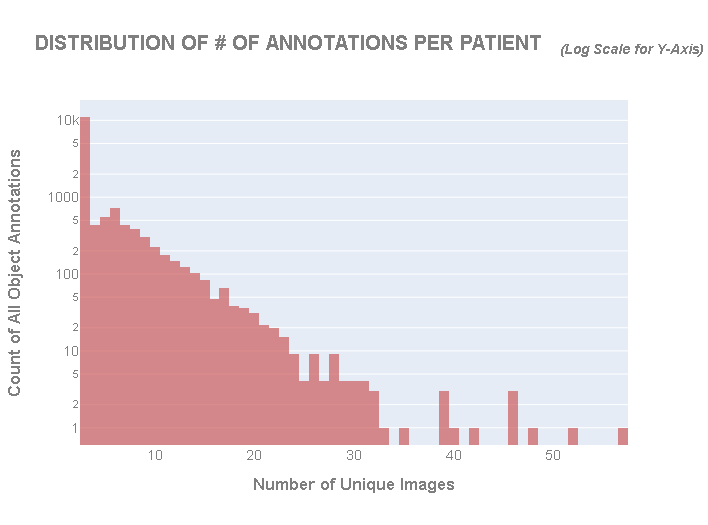

<b style = "text-decoration : underline; font-family : Verdana;"> 이미지 당 고유한 개체 주석 </b>

고유한 **`image_id`** 값당 **UNIQUE** 객체 레이블 주석의 분포를 계산해 보겠습니다. 즉, 방사선 전문의가 이미지에서 8 개의 결절을 식별하면 이를 1 개의 고유한 객체 주석으로 계산합니다. 이것의 목표는 동일한 환자 내에서 발생하는 다양한 질병의 분포를 결정하는 것입니다.

1 개의 고유한 이상에 존재하는 많은 수의 값을 처리하기 위해 카운트 축에 대해 로그 축을 사용합니다.

---

** 아래에 표시된 히스토그램에서 다음 정보를 확인할 수 있습니다.**
* 이미지는 10 개 이상의 고유한 이상(abnormalities)을 포함하지 않습니다 (가능한 14 개 중).
* 이미지에 고유한 이상(abnormalities)이 많을수록 더 드뭅니다.

<!--
<b style="text-decoration: underline; font-family: Verdana;">UNIQUE OBJECT ANNOTATIONS PER IMAGE</b>

Let's count the distribution of **UNIQUE** object-label annotations per unique **`image_id`** value. This means if a radiologist identifies 8 nodules in an image, we count that as 1 unique object annotation. The goal of this is to determine the distributions of different diseases occuring within the same patient.

Note that we use a log-axis for the count axis to handle the large number of values present at 1 unique abnormality

---

**From the histogram plotted below we can ascertain the following information:**
* Images contain no more than 10 unique abnormalities (out of a possible 14)
* The more unique abnormalities present in an image, the rarer it is.
-->


In [ ]:
fig = px.histogram(train_df.groupby('image_id')["class_name"].unique().apply(lambda x: len(x)), 
             log_y=True, color_discrete_sequence=['skyblue'], opacity=0.7,
             labels={"value":"Number of Unique Abnormalities"},
             title="<b>DISTRIBUTION OF # OF ANNOTATIONS PER PATIENT   " \
                   "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Unique Abnormalities</b>",
                  yaxis_title="<b>Count of Unique Patients</b>",
                  font=FIG_FONT,)
fig.show()

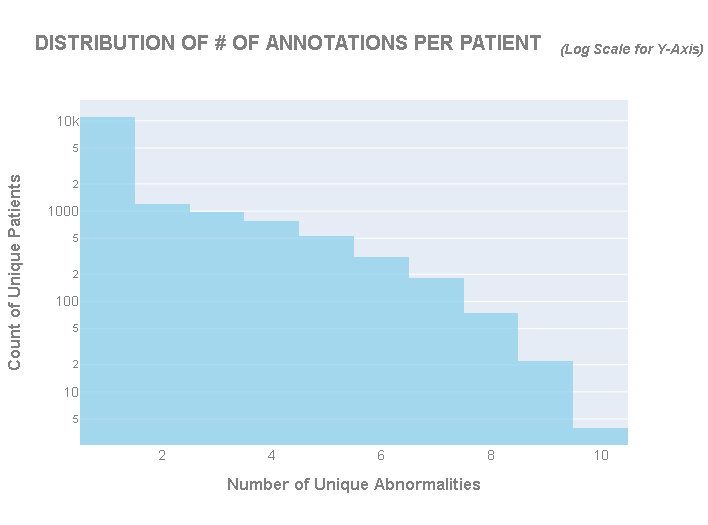

##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.2  CLASS_NAME COLUMN EXPLORATION</h3>

class_name 열은 레이블을 각 객체(object) / 주석(annotation)에 대한 문자열로 나타냅니다 (각 행은 하나의 객체(object) / 주석(annotation)에 대한 것임).

클래스 별 주석

가능한 class_names가 15 가지라는 것을 알고 있습니다 (찾을 수 없음 포함). 레이블 전체의 개수 분포를 식별하기 위해 막대 차트를 사용합니다.

<!--
The **`class_name`** column indicates the <b style="text-decoration: underline;">label as a string</b> for the respective object/annotation (each row is for one object/annotation). 
<br><br>

<b style="text-decoration: underline; font-family: Verdana;">ANNOTATIONS PER CLASS</b>

We know there are 15 different possible **`class_name`**s (including **`No finding`**). To identify the distribution of counts across the labels we will use a bar-chart.
-->


In [ ]:
fig = px.bar(train_df.class_name.value_counts().sort_index(), 
             color=train_df.class_name.value_counts().sort_index().index, opacity=0.85,
             color_discrete_sequence=LABEL_COLORS, log_y=True,
             labels={"y":"Annotations Per Class", "x":""},
             title="<b>Annotations Per Class</b>",)
fig.update_layout(legend_title=None,
                  font=FIG_FONT,
                  xaxis_title="",
                  yaxis_title="<b>Annotations Per Class</b>")

fig.show()

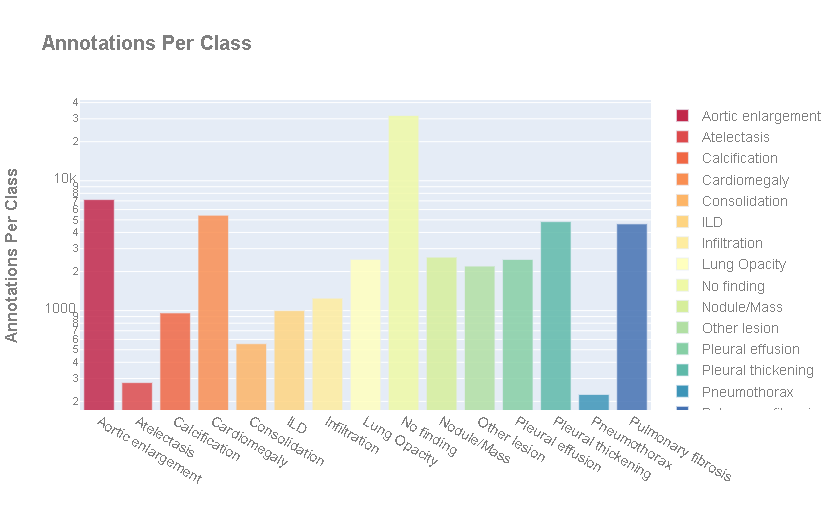

##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.3  CLASS_ID COLUMN EXPLORATION</h3>


**`class_id`** 열은 <b style = "text-decoration : underline;"> 숫자로 인코딩 된 라벨 </b> 각각의 객체 / 주석 (각 행은 하나의 객체 / 주석에 대한 것임)을 나타냅니다. 이를 알면 숫자 표현으로 작업하기 때문에 이전 **class_name** 열을 제거합니다. 제거하기 전에 숫자 레이블을 각각의 문자열 표현으로 다시 번역할 수 있는 맵을 생성합니다.

<!--
The **`class_id`** column indicates the <b style="text-decoration: underline;">label encoded as a number</b> the respective object/annotation (each row is for one object/annotation). Knowing this, we will remove the previous **class_name** column, as we would rather work with a numeric representation. Prior to removal we will generate a map that will allow us to translate the numeric labels back into their respective string represntations.
-->


In [ ]:
# Create dictionary mappings
int_2_str = {i:train_df[train_df["class_id"]==i].iloc[0]["class_name"] for i in range(15)}
str_2_int = {v:k for k,v in int_2_str.items()}
int_2_clr = {str_2_int[k]:LABEL_COLORS[i] for i,k in enumerate(sorted(str_2_int.keys()))}

print("\n... Dictionary Mapping Class Integer to Class String Representation [int_2_str]...\n")
display(int_2_str)

print("\n... Dictionary Mapping Class String to Class Integer Representation [str_2_int]...\n")
display(str_2_int)

print("\n... Dictionary Mapping Class Integer to Color Representation [str_2_clr]...\n")
display(int_2_clr)

print("\n... Head of Train Dataframe After Dropping The Class Name Column...\n")
train_df.drop(columns=["class_name"], inplace=True)
display(train_df.head(5))


... Dictionary Mapping Class Integer to Class String Representation [int_2_str]...



{0: 'Aortic enlargement',
 1: 'Atelectasis',
 2: 'Calcification',
 3: 'Cardiomegaly',
 4: 'Consolidation',
 5: 'ILD',
 6: 'Infiltration',
 7: 'Lung Opacity',
 8: 'Nodule/Mass',
 9: 'Other lesion',
 10: 'Pleural effusion',
 11: 'Pleural thickening',
 12: 'Pneumothorax',
 13: 'Pulmonary fibrosis',
 14: 'No finding'}


... Dictionary Mapping Class String to Class Integer Representation [str_2_int]...



{'Aortic enlargement': 0,
 'Atelectasis': 1,
 'Calcification': 2,
 'Cardiomegaly': 3,
 'Consolidation': 4,
 'ILD': 5,
 'Infiltration': 6,
 'Lung Opacity': 7,
 'Nodule/Mass': 8,
 'Other lesion': 9,
 'Pleural effusion': 10,
 'Pleural thickening': 11,
 'Pneumothorax': 12,
 'Pulmonary fibrosis': 13,
 'No finding': 14}


... Dictionary Mapping Class Integer to Color Representation [str_2_clr]...



{0: 'rgb(193, 39, 74)',
 1: 'rgb(221, 74, 76)',
 2: 'rgb(240, 103, 68)',
 3: 'rgb(249, 142, 82)',
 4: 'rgb(253, 181, 103)',
 5: 'rgb(254, 212, 129)',
 6: 'rgb(254, 236, 159)',
 7: 'rgb(255, 255, 190)',
 14: 'rgb(239, 249, 166)',
 8: 'rgb(214, 238, 155)',
 9: 'rgb(177, 223, 163)',
 10: 'rgb(134, 207, 165)',
 11: 'rgb(94, 185, 169)',
 12: 'rgb(61, 149, 184)',
 13: 'rgb(68, 113, 178)'}


... Head of Train Dataframe After Dropping The Class Name Column...



,image_id,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,14,R10,NaN,NaN,NaN,NaN


##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.4  RAD_ID COLUMN EXPLORATION</h3>


**`rad_id`** 열은 <b style = "text-decoration : underline;"> 관찰한 방사선과 의사의 ID </b>를 나타냅니다. 세 명의 방사선 전문의가 17 명의 가능한 방사선 전문의 풀에서 주어진 이미지에 주석을 달 것임을 기억하십시오. 방사선 전문의 ID는 R1에서 R17로 인코딩됩니다.
<br> <br>

<b style = "text-decoration : underline; font-family : Verdana;"> 방사선 전문의 별 주석 </b>

가능한 방사선 전문의는 17 명 (**`rad_id`** s)입니다. 방사선 전문의에 걸쳐 수행 된 주석의 분포를 식별하기 위해 히스토그램을 사용합니다.

---

**아래에 표시된 히스토그램에서 다음 정보를 확인할 수 있습니다**
* 방사선 전문의 3 명 (순서대로 R9, R10, R8)이 대부분의 주석 (모든 주석의 약 40-50 %)을 담당합니다.
* 다른 11 명의 방사선 전문의 중에는 주석의 수에 약간의 차이가 있지만, 이 11 명의 방사선 전문의는 모두 3121 개의 주석과 812 개의 주석 사이에서 작성했으며 대다수는 1800-2200 개의 객체에 주석을 달았습니다.

<!--
The **`rad_id`** column indicates the <b style="text-decoration: underline;">the ID of the radiologist that made the observation</b>. Remember, three radiologists will annotate a given image out of a pool of seventeen possible radiologists, where the radiologist ID is encoded from R1 to R17.
<br><br>

<b style="text-decoration: underline; font-family: Verdana;">ANNOTATIONS PER RADIOLOGIST</b>

We know there are 17 possible radiologists (**`rad_id`**s). To identify the distribution of annotations performed across the radiologists we will use a historgram.

---

**From the histogram plotted below we can ascertain the following information**
* 3 of the radiologists (R9, R10, & R8 in that order) are responsible for the vast majority of annotations (~40-50% of all annotations)
* Among the other 11 radiologists there is some variation around the number of annotations made, however, these 11 radiologists all made between 3121 annotations and 812 annotations with the vast majority annotating 1800-2200 objects.
-->


<a style="color: navy; background-color: #000000;">
* 주석의 정확성이 확보되었을까?<br> 
* 사람별로 편차가 너무 큰 것으로 보아 주석 처리되지 않고 누락된 것들이 많이 있을 듯함.<br> 
* R8, R9, R10 으로만 Train 하는 것이 좋지 않을까?<br> 
* R1 - R7 과 R11 - R17 을 별도의 그룹으로 나누어서 처리하는 것이 좋을듯 함<br> </a>

In [ ]:
fig = px.histogram(train_df, x="rad_id", color="rad_id",opacity=0.85,
                   labels={"rad_id":"Radiologist ID"},
                   title="<b>DISTRIBUTION OF # OF ANNOTATIONS PER RADIOLOGIST</b>",
                   ).update_xaxes(categoryorder="total descending")
fig.update_layout(legend_title="<b>RADIOLOGIST ID</b>",
                  xaxis_title="<b>Radiologist ID</b>",
                  yaxis_title="<b>Number of Annotations Made</b>",
                  font=FIG_FONT,)
fig.show()

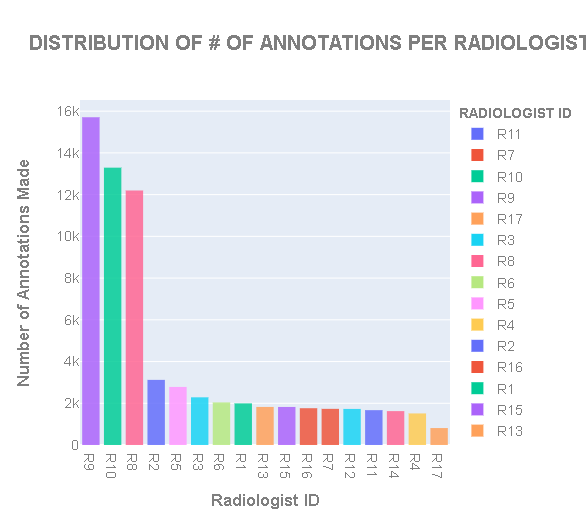

<b style = "text-decoration : underline; font-family : Verdana;"> 등급 레이블로 구분된 방사선 학자별 주석 </b>

우리는 이미 3 명의 방사선 전문의가 모든 주석의 거의 50 %를 담당하고 있음을 확인했습니다. 이제 모든 방사선 전문의가 15 개의 클래스를 모두 보고 주석을 달 수 있는지 확인하려고 합니다. 그렇다면 발생할 수 있는 추가 왜곡이나 문제를 식별할 수 있습니까?

---

**아래에 표시된 첫 번째 히스토그램에서 다음 정보를 확인할 수 있습니다.**
* 방사선 전문의 3 명 (순서대로 R9, R10, R8)이 대부분의 주석 (모든 주석의 약 40-50 %)을 담당합니다.
* 다른 11 명의 방사선 전문의 중에는 주석의 수에 약간의 차이가 있지만, 이 11 명의 방사선 전문의는 모두 3121 개의 주석과 812 개의 주석 사이에서 작성했으며 대다수는 1800-2200 개의 객체에 주석을 달았습니다.

---

**아래에 표시된 두 번째 히스토그램에서 다음 정보를 확인할 수 있습니다.**
* 다른 11 명의 방사선 사 중 7 명 (R1 ~ R7)은 이미지에 **`찾을 수 없음`**이라는 주석만 달았습니다.
* 다른 4 명의 방사선 전문의는 주요 3 명의 방사선 전문의 (R8 ~ R10)와 비교할 때 **`찾을 수 없음`** 라벨쪽으로 크게 치우쳐 있습니다. 이것은 실제로 전체 분포에 더 가까운 것처럼 보이지만 R8, R9 및 R10 이외의 방사선 전문의가 이미지에 **`찾을 수 없음`**으로 주석을 달 가능성이 훨씬 더 높다고 추정 할 수 있습니다.
*이 분포의 단점은 모델에 이 정보를 포함하면 모델이 7 명의 방사선 전문의가 이미지를 **`찾을 수 없음`**으로 100 % 분류한다는 것을 알게 된다는 것입니다!

<sup> <b> <i> & nbsp; & nbsp; & nbsp; & nbsp; & nbsp; & nbsp; & nbsp; & nbsp;이 두 번째 플롯은 이 기능이 내장되어 있으므로 첫 번째 히스토그램과 상호 작용하여 생성 될 수 있습니다. </ i> </ b> </ sup>

<!--
<b style="text-decoration: underline; font-family: Verdana;">ANNOTATIONS PER RADIOLOGIST SEPERATED BY CLASS LABEL</b>

We have already identified that three of the radiologists are responsible for almost 50% of all of the annotations. We would now like to identify if all of the radiologists were able to see and annotate all 15 classes. If so, can we identify any additional skew or problems that might arise?

---

**From the first histogram plotted below we can ascertain the following information**
* 3 of the radiologists (R9, R10, & R8 in that order) are responsible for the vast majority of annotations (~40-50% of all annotations)
* Among the other 11 radiologists there is some variation around the number of annotations made, however, these 11 radiologists all made between 3121 annotations and 812 annotations with the vast majority annotating 1800-2200 objects.

---

**From the second histogram plotted below we can ascertain the following information**
* Among the other 11 radiologists, 7 of them (R1 through R7) have only ever annotated images as **`No finding`**
* The other 4 radiologists are also heavily skewed towards the **`No finding`** label when compared to the main 3 radiologists (R8 through R10). This seems to actually be closer to the overall distribution, however it might allow us to estimate that radiologists other than R8, R9, and R10, are much more likely to annotate images as **`No finding`**.
* The downside to this distribution, is that if we include this information in the model than the model will learn that 7 of the radiologists classify images as **`No finding`** 100% of the time!

<sup><b><i>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Note that this second plot could have been generated by interacting with the first histogram as plotly has this functionality built-in</i></b></sup>
-->


In [ ]:
# #################################################################### #
#  TO DO - NORMALIZE RADIOLOGIST COUNTS BASED ON ANNOTATION PER IMAGE  #
# #################################################################### #

fig = go.Figure()

for i in range(15):
    fig.add_trace(go.Histogram(
        x=train_df[train_df["class_id"]==i]["rad_id"],
        marker_color=int_2_clr[i],
        name=f"<b>{int_2_str[i]}</b>"))

fig.update_xaxes(categoryorder="total descending")
fig.update_layout(title="<b>DISTRIBUTION OF CLASS LABEL ANNOTATIONS BY RADIOLOGIST</b>",
                  barmode='stack',
                  xaxis_title="<b>Radiologist ID</b>",
                  yaxis_title="<b>Number of Annotations Made</b>",
                  font=FIG_FONT,)
fig.show()

fig = go.Figure()
for i in range(15):
    fig.add_trace(go.Histogram(
        x=train_df[(train_df["class_id"]==i) & (~train_df["rad_id"].isin(["R8","R9","R10"]))]["rad_id"],
        marker_color=int_2_clr[i],
        name=f"<b>{int_2_str[i]}</b>"))

fig.update_xaxes(categoryorder="total descending")
fig.update_layout(title="<b>DISTRIBUTION OF CLASS LABEL ANNOTATIONS BY RADIOLOGIST   " \
                  "<i><sub>(EXCLUDING TOP 3 RADIOLOGISTS --> R8, R9 & R10)</sub></i></b>",
                  barmode='stack',
                  xaxis_title="<b>Radiologist ID</b>",
                  yaxis_title="<b>Number of Annotations Made</b>",
                  font=FIG_FONT,)
fig.show()

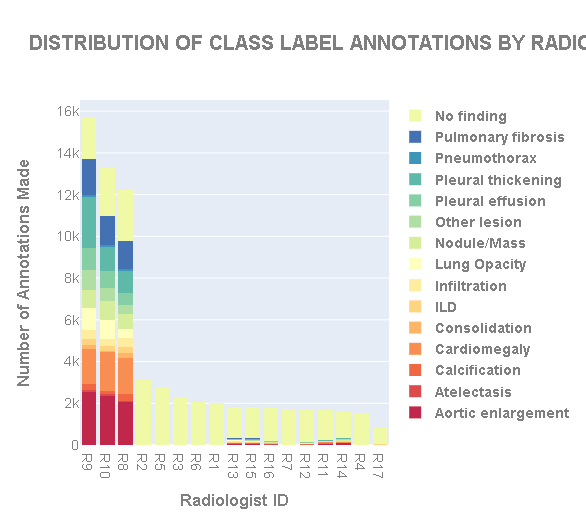

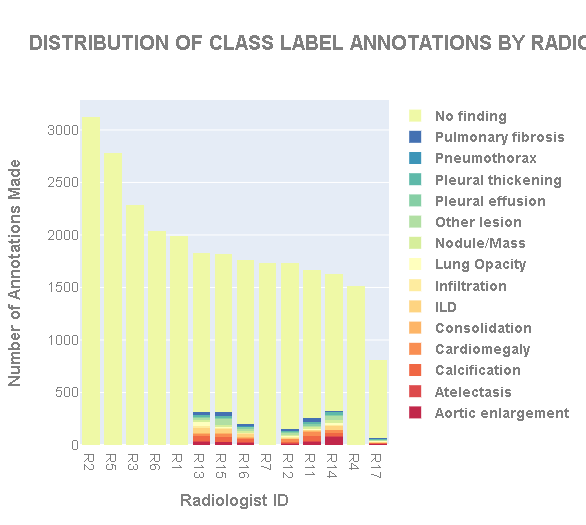

##<h3 style="text-align: font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;">4.5  EXPLORATION OF BBOX COORDINATE COLUMNS</h3>

**`x_min`**, **`y_min`**, **`x_max`** 및 **`y_max`** 열은 <b style = "text-decoration : underline;"> 위치를 나타냅니다. 주석이 달린 객체 경계 상자 </b>의 왼쪽 상단 모서리는 튜플(**`x_min`**, **`y_min`**)로 표시되고 오른쪽 하단 모서리는 튜플(**`x_max`**, **`y_max`**)로 표시됩니다. .

**`NaN`** 값은 레이블 14 (**`찾을 수 없음`**)와 일치하며 주석을 추가할 항목이 없음 (건강한 X-ray)을 의미합니다. <br>
이 열을 검사하기 위해 <b style = "text-decoration : underline;"> 객체에 경계 상자로 주석이 달린 행만 검사합니다 </b> <br>
(예 : 라벨이 **`검색 결과 없음`** 인 모든 행이 삭제됩니다.) <br> <br>

<b style = "text-decoration : underline; font-family : Verdana;"> 다양한 클래스를 위한 경계 상자를 나타내는 히트 맵 플롯 </ b>

이 플롯에는 소화할 것이 많습니다. 집중해야 할 중요한 것은 각 클래스에 대해 주석이 있는 대략적인 위치 범위와 히트 맵 내 위치의 강도를 식별하는 것입니다.

---

**아래에 표시된 히트 맵에서 다음 정보를 확인할 수 있습니다**
* 대동맥 확대 관련 <i> <sub> (CLASS-ID : 0) </sub> </i>
    * 히트 맵 분포는 약간 타원형 (수직)이며 이미지 중앙에 위치하며 매우 단단하고 강렬합니다 (오른쪽 상단으로 약간 드리프트).
* 무기폐 관련 <i> <sub> (CLASS-ID : 1) </sub> </i>
    * 히트 맵 분포는 폐 모양이며 왼쪽 폐의 왼쪽 상단 부분에 원형 초점을두고 상대적으로 확산됩니다.
* 석회화 관련 <i> <sub> (CLASS-ID : 2) </sub> </i>
    * 히트 맵 분포는 폐 모양이며 오른쪽 폐의 왼쪽 상단 가장자리에 타원형 (수직) 초점을두고 상대적으로 확산됩니다.
* 심장 비대증 관련 <i> <sub> (CLASS-ID : 3) </sub> </i>
    * 히트 맵 분포는 직사각형이며 이미지의 하단 중앙 (오른쪽 하단)에 위치하며 매우 조밀하고 강렬합니다.
* 통합 관련 <i> <sub> (CLASS-ID : 4) </sub> </i>
    * 히트 맵 분포는 폐 모양이고 상대적으로 확산되며 분포의 초점은 전체 왼쪽 폐를 포함합니다.
* ILD 관련 <i> <sub> (CLASS-ID : 5) </sub> </i>
    * 히트 맵 분포는 폐 모양이며 상대적으로 확산되며 초점은 폐의 중심으로 약간 기울어집니다.
* 침입 관련 <i> <sub> (CLASS-ID : 6) </sub> </i>
    * 히트 맵 분포는 폐 모양이고 상대적으로 확산되며 분포의 초점은 전체 왼쪽 폐를 포함합니다.
* 폐 불투명도 관련 <i> <sub> (CLASS-ID : 7) </sub> </i>
    * 히트 맵 분포는 폐 모양이고 상대적으로 확산되며 분포의 초점은 전체 왼쪽 폐를 포함합니다.
* 결절 / 질량 <i> <sub> (CLASS-ID : 8) </sub> </i> 관련
    * 히트 맵 분포는 폐 모양이며 상대적으로 확산되며 초점은 폐의 중심으로 약간 기울어집니다. <b> (참고 : 확산 패턴이 고르지 않게 보입니다 ... 아마도 경계 상자가 더 작기 때문일 것입니다.) </ b>
* 기타 병변 관련 <i> <sub> (CLASS-ID : 9) </sub> </i>
    * 히트 맵 분포는 엄청나게 확산되어 대부분의 이미지를 덮으며 초점은 이미지 중앙의 수직 스트립을 향합니다.
* 흉막 삼출 관련 <i> <sub> (CLASS-ID : 10) </sub> </i>
    * 히트 맵 분포는 폐 모양 (약간 더 직사각형?)이고 상대적으로 분산되어 있으며 초점은 폐의 바닥을 향하고 있으며 두 폐가 모두 덮여 있지만 왼쪽 폐가 초점이 더 강합니다.
* 흉막 비후 관련 <i> <sub> (CLASS-ID : 11) </sub> </i>
    * 히트 맵 분포는 모호한 폐 모양입니다 (상단 근처에 패치가 있고 바깥 쪽 폐 가장자리가 흐려짐에 따라 아래로 초점이 흐려짐). 초점은 폐 상단을 향한 타원형 (수평)입니다.
* 기흉 관련 <i> <sub> (CLASS-ID : 12) </sub> </i>
    * 히트 맵 분포는 폐 모양 (더 직사각형)이며 초점은 왼쪽 폐 전체에 있지만 오른쪽 폐에는 일부 확산 범위가 있습니다.
* 폐 섬유증 관련 <i> <sub> (CLASS-ID : 13) </sub> </i>
    * 히트 맵 분포는 모호한 폐 모양이며 (상단 근처에 패치가 적용되고 폐가 사라지면서 아래로 초점이 흐려짐) 초점은 폐 상단을 향하고 타원형입니다.

<!--
The **`x_min`**, **`y_min`**, **`x_max`**, and **`y_max`** columns indicate the <b style="text-decoration: underline;">location of the annotated object bounding box</b>, where the top-left corner is represented by the tuple (**`x_min`**, **`y_min`**) and the bottom-right corner is represented by the tuple (**`x_max`**, **`y_max`**).

A value of **`NaN`** coincides with a label 14 (**`No finding`**) and means that there is nothing to annotate (healthy x-ray).<br>
For the purpose of examining these columns we will <b style="text-decoration: underline;">only be examining rows where the objects have been annotated with a bounding box</b><br>
(i.e. All rows with a label of **`No finding`** will be discarded)<br><br>

<b style="text-decoration: underline; font-family: Verdana;">PLOT HEATMAP REPRESENTING BOUNDING BOXES FOR VARIOUS CLASSES</b>

There's a lot to digest within these plots. The important thing to focus on will be identifying for each class the approximate range of locations the annotations are found in and the intensity of the locations within the heatmap.

---

**From the heatmaps plotted below we can ascertain the following information**
* Regarding Aortic Enlargement <i><sub>(CLASS-ID: 0)</sub></i>
    * Heatmap distribution is slightly oval (vertical) and is very tight and intense, located in the centre of the image (slight drift to the top-right).
* Regarding Atelectasis <i><sub>(CLASS-ID: 1)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse with a circular focus on the upper-left part of the left lung.
* Regarding Calcification <i><sub>(CLASS-ID: 2)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse with a oval (vertical) focus on the top-left edge of the right lung.
* Regarding Cardiomegaly <i><sub>(CLASS-ID: 3)</sub></i>
    * Heatmap distribution is rectangular and is very tight and intense, located in the bottom-centre (to bottom-centre-right) of the image.
* Regarding Consolidation <i><sub>(CLASS-ID: 4)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus of the distribution covers the entire left lung.
* Regarding ILD <i><sub>(CLASS-ID: 5)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus leans a little towards the centre of the lungs.
* Regarding Infiltration <i><sub>(CLASS-ID: 6)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus of the distribution covers the entire left lung.
* Regarding Lung Opacity <i><sub>(CLASS-ID: 7)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus of the distribution covers the entire left lung.
* Regarding Nodule/Mass <i><sub>(CLASS-ID: 8)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus leans a little towards the centre of the lungs. <b>(NOTE: The diffusion pattern looks patchy... probably due to smaller bounding boxes)</b>
* Regarding Other Lesion <i><sub>(CLASS-ID: 9)</sub></i>
    * Heatmap distribution is incredibly diffuse and covers most of the image, the focus is towards a vertical-strip in the centre of the image.
* Regarding Pleural Effusion <i><sub>(CLASS-ID: 10)</sub></i>
    * Heatmap distribution is lung shaped (slightly more rectangular?) and relatively diffuse, the focus is towards the bottom of the lungs and although both lungs are covered, the left lung has a stronger focus.
* Regarding Pleural Thickening <i><sub>(CLASS-ID: 11)</sub></i>
    * Heatmap distribution is vaguely lung shaped (patches near top and focus trails down exterior lung edge fading as it goes), the focus is towards the top of the lungs is oval (horizontal).
* Regarding Pneumothorax <i><sub>(CLASS-ID: 12)</sub></i>
    * Heatmap distribution is lung shaped (more rectangular), the focus is on the entire left lung however the right lung has some diffuse coverage.
* Regarding Pulmonary Fibrosis <i><sub>(CLASS-ID: 13)</sub></i>
    * Heatmap distribution is vaguely lung shaped (patches near top and focus trails down lung fading as it goes), the focus is towards the top of the lung and it is oval.
-->


In [ ]:
# Get paths to images where bboxes exist `class_id!=14`
bbox_df = train_df[train_df.class_id!=14].reset_index(drop=True)
BBOX_PATHS = [
    os.path.join(TRAIN_DIR, name+".dicom") \
    for name in bbox_df.image_id.unique()
]

# Initalize our map for image sizes
sizes_of_images_w_bboxes = {}

# ############################################################### #
# ############## THIS STEP WILL TAKE 15-30 MINUTES ############## #
# ############################################################### #
#
# Get the image sizes so we can resize the bboxes all based on a static size
# so that we can generate a heatmap that is representative of the actual
# locations of annotations
for path in tqdm(BBOX_PATHS, total=len(BBOX_PATHS)):
    dicom = pydicom.read_file(path)
    sizes_of_images_w_bboxes[path[:-6].rsplit("/", 1)[1]] = \
        (dicom.Rows, dicom.Columns)
# ############################################################### #

# Create new dataframe columns for the source image width and height
bbox_df["img_height"] = bbox_df["image_id"].map(lambda x: sizes_of_images_w_bboxes[x][0])
bbox_df["img_width"] = bbox_df["image_id"].map(lambda x: sizes_of_images_w_bboxes[x][1])

# Create new dataframe columns for the bboxes that is a 
# percentage of the respective source image width and height
#   -- i.e. if x_min is 100 and the image width is 1000 than frac_x_min is 0.1
#   -- i.e. if y_max is 28 and the image height is 900 than frac_y_max is 0.031
#
# This will allow us to pick a heat-map size and make sure that we can use
# all of the bounding boxes and scale them appropriately
#   -- NOTE: We will most likely default the heatmap to the average
#            image shape so that there is as little distortion as possible
bbox_df["frac_x_min"], bbox_df["frac_x_max"], bbox_df["frac_y_min"], bbox_df["frac_y_max"] = \
    zip(*bbox_df.apply(create_fractional_bbox_coordinates, axis=1))

# # Record some important values for later
ave_src_img_height = np.mean([size[0] for size in sizes_of_images_w_bboxes.values()], dtype=np.int32)
ave_src_img_width  = np.mean([size[1] for size in sizes_of_images_w_bboxes.values()], dtype=np.int32)

# # Preview the dataframe
bbox_df.head()

,image_id,class_id,rad_id,x_min,y_min,x_max,y_max,img_height,img_width,frac_x_min,frac_x_max,frac_y_min,frac_y_max
0,9a5094b2563a1ef3ff50dc5c7ff71345,3,R10,691.0,1375.0,1653.0,1831.0,2336,2080,0.332212,0.794712,0.588613,0.783818
1,051132a778e61a86eb147c7c6f564dfe,0,R10,1264.0,743.0,1611.0,1019.0,2880,2304,0.548611,0.699219,0.257986,0.353819
2,1c32170b4af4ce1a3030eb8167753b06,11,R9,627.0,357.0,947.0,433.0,3072,2540,0.246850,0.372835,0.116211,0.140951
3,0c7a38f293d5f5e4846aa4ca6db4daf1,5,R17,1347.0,245.0,2188.0,2169.0,2555,2285,0.589497,0.957549,0.095890,0.848924
4,47ed17dcb2cbeec15182ed335a8b5a9e,8,R9,557.0,2352.0,675.0,2484.0,3353,2568,0.216900,0.262850,0.701461,0.740829


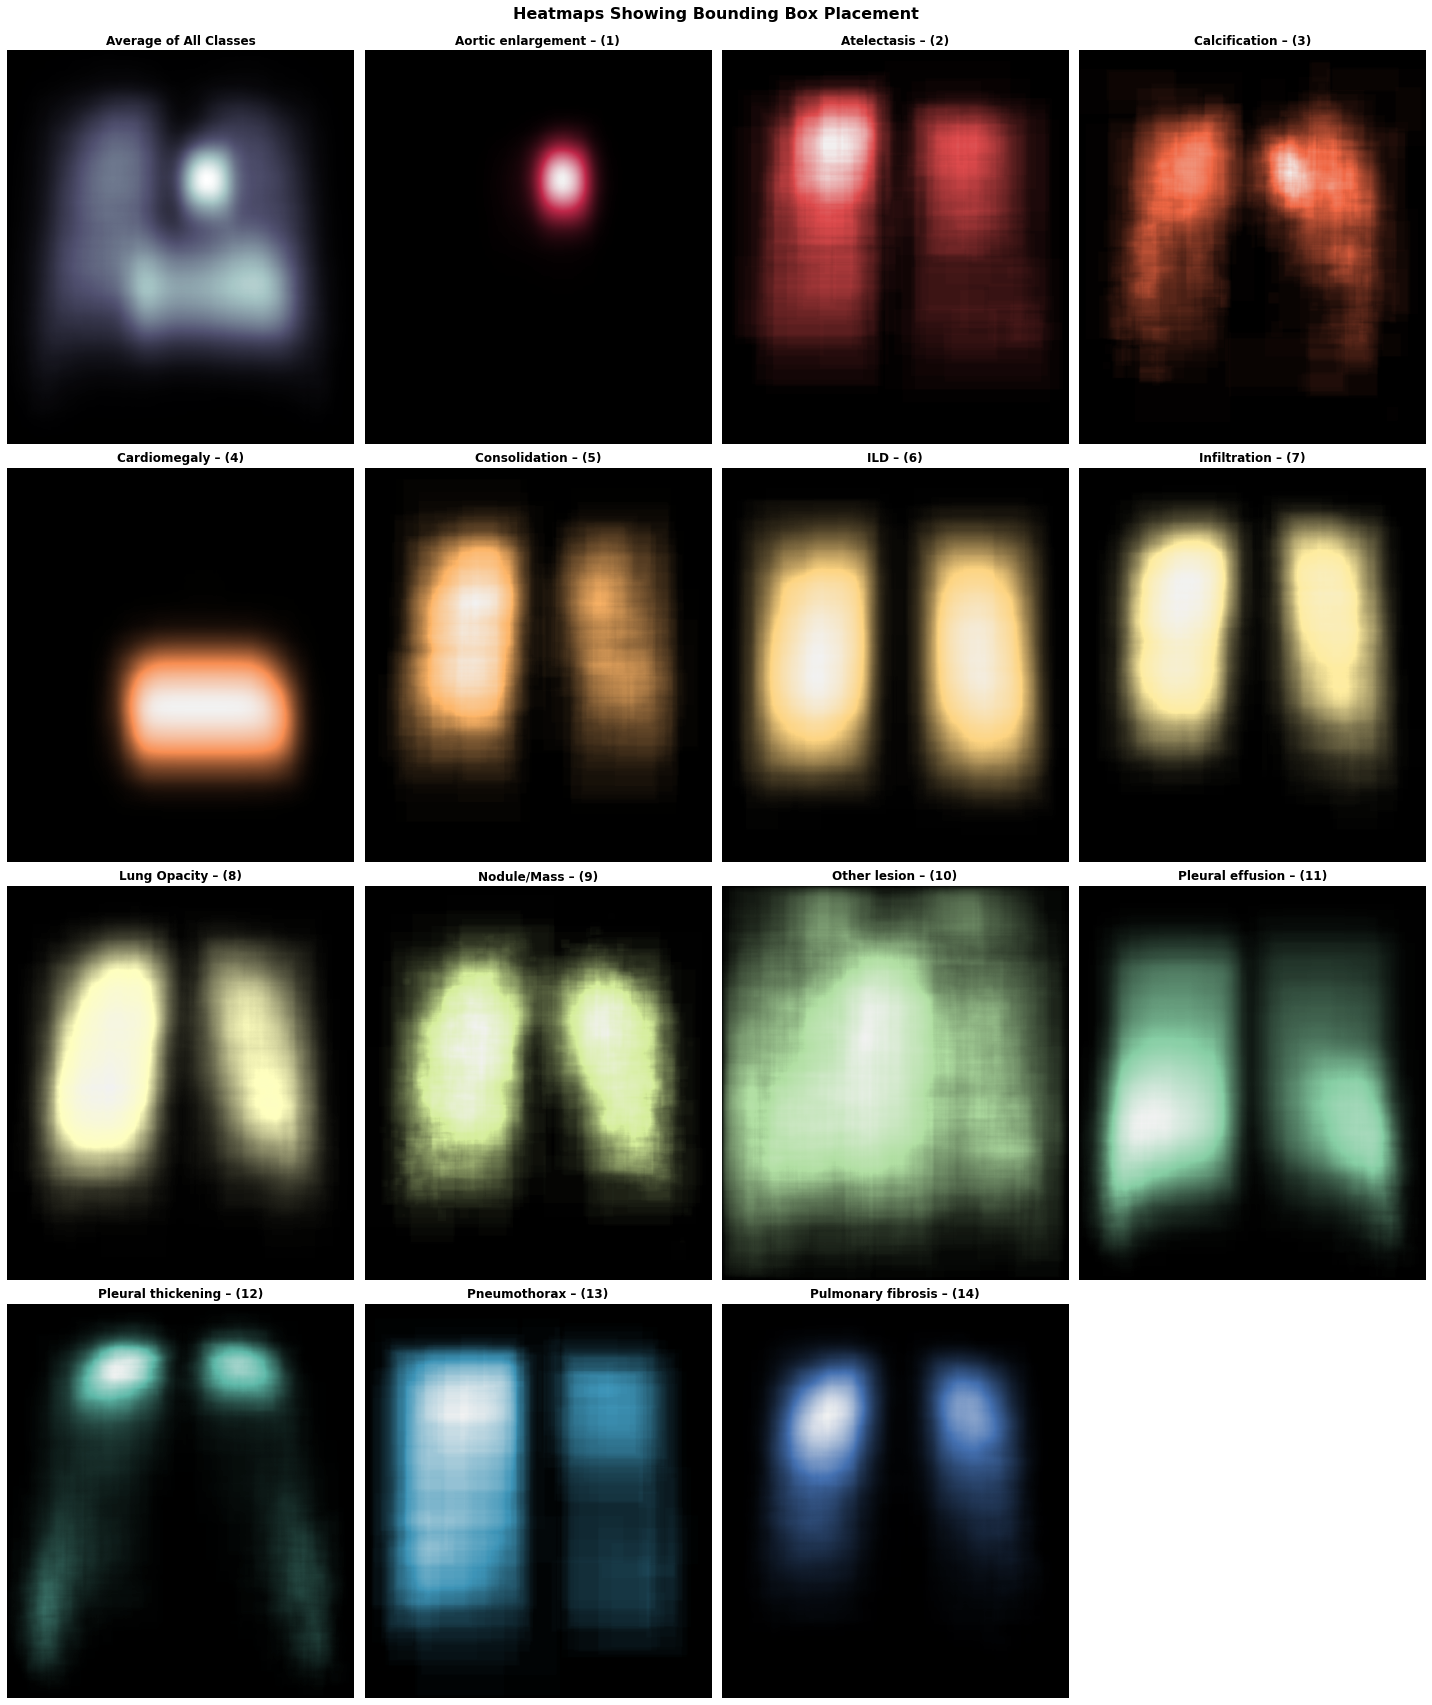

In [ ]:
# DEFAULT
HEATMAP_SIZE = (ave_src_img_height, ave_src_img_width, 14)

# Initialize
heatmap = np.zeros((HEATMAP_SIZE), dtype=np.int16)
bbox_np = bbox_df[["class_id", "frac_x_min", "frac_x_max", "frac_y_min", "frac_y_max"]].to_numpy()
bbox_np[:, 1:3] *= ave_src_img_width
bbox_np[:, 3:5] *= ave_src_img_height
bbox_np = np.floor(bbox_np).astype(np.int16)

# Color map stuff
custom_cmaps = [
    matplotlib.colors.LinearSegmentedColormap.from_list(
        colors=[(0.,0.,0.), c, (0.95,0.95,0.95)], 
        name=f"custom_{i}") for i,c in enumerate(sns.color_palette("Spectral", 15))
]
custom_cmaps.pop(8) # Remove No-Finding

for row in tqdm(bbox_np, total=bbox_np.shape[0]):
    heatmap[row[3]:row[4]+1, row[1]:row[2]+1, row[0]] += 1
    
fig = plt.figure(figsize=(20,25))
plt.suptitle("Heatmaps Showing Bounding Box Placement\n ", fontweight="bold", fontsize=16)
for i in range(15):
    plt.subplot(4, 4, i+1)
    if i==0:
        plt.imshow(heatmap.mean(axis=-1), cmap="bone")
        plt.title(f"Average of All Classes", fontweight="bold")
    else:
        plt.imshow(heatmap[:, :, i-1], cmap=custom_cmaps[i-1])
        plt.title(f"{int_2_str[i-1]} – ({i})", fontweight="bold")
        
    plt.axis(False)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<b style="text-decoration: underline; font-family: Verdana;">INVESTIGATE THE SIZES OF BOUNDING BOXES AND THE IMPACT OF CLASS</b>

다양한 클래스 기반 경계 상자 통계의 상한 및 하한과 평균을 조사하기 위해 상자 그림을 사용하여 조사합니다. 이해하기 쉽게하기 위해 다음과 같은 기본 버킷을 고려해 보겠습니다.
<!--
As we wish to examine the average, as well as the upper and lower limits for various class-based bounding box statistics, we will use a box plot to investigate. To make things easier to understand let us consider the following basic buckets.
-->

<b><u>Bounding Box Area - Median</u></b>
* Under   0.01 –– <b>Smallest</b>
* 0.01 to 0.02 –– <b>Small</b>
* 0.02 to 0.04 –– <b>Medium</b>
* 0.04 to 0.06 –– <b>Large</b>
* Above   0.06 –– <b>Largest</b>

<b><u>Bounding Box Area - Quartile Range</u></b>
* Under     0.0075 –– <b>Smallest</b>
* 0.0075 to 0.0125 –– <b>Small</b>
* 0.0125 to 0.0250 –– <b>Medium</b>
* 0.0250 to 0.0500 –– <b>Large</b>
* Above     0.0500 –– <b>Largest</b>

---

**From the boxplot plotted below we can ascertain the following information**
* Regarding Aortic Enlargement Box Plot <i><sub>(CLASS-ID: 0)</sub></i>
    * Median Value is <b>Small</b>  –––  Quartile Range is <b>Smallest</b>
* Regarding Atelectasis Box Plot <i><sub>(CLASS-ID: 1)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding Calcification Box Plot <i><sub>(CLASS-ID: 2)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Medium</b>
* Regarding Cardiomegaly Box Plot <i><sub>(CLASS-ID: 3)</sub></i>
    * Median Value is <b>Large</b>  –––  Quartile Range is <b>Large</b>
* Regarding Consolidation Box Plot <i><sub>(CLASS-ID: 4)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding ILD Box Plot <i><sub>(CLASS-ID: 5)</sub></i>
    * Median Value is <b>Largest</b>  –––  Quartile Range is <b>Largest</b>
* Regarding Infiltration Box Plot <i><sub>(CLASS-ID: 6)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding Lung Opacity Box Plot <i><sub>(CLASS-ID: 7)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding Nodule/Mass Box Plot <i><sub>(CLASS-ID: 8)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Smallest</b>
* Regarding Other Lesion Box Plot <i><sub>(CLASS-ID: 9)</sub></i>
    * Median Value is <b>Small</b>  –––  Quartile Range is <b>Large</b>
* Regarding Pleural Effusion Box Plot <i><sub>(CLASS-ID: 10)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Large</b>
* Regarding Pleural Thickening Box Plot <i><sub>(CLASS-ID: 11)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Smallest</b>
* Regarding Pneumothorax Box Plot <i><sub>(CLASS-ID: 12)</sub></i>
    * Median Value is <b>Largest</b>  –––  Quartile Range is <b>Largest</b>
* Regarding Pulmonary Fibrosis Box Plot <i><sub>(CLASS-ID: 13)</sub></i>
    * Median Value is <b>Small</b>  –––  Quartile Range is <b>Medium</b>


In [ ]:
# Update bbox dataframe to make this easier
bbox_df["frac_bbox_area"] = (bbox_df["frac_x_max"]-bbox_df["frac_x_min"])*(bbox_df["frac_y_max"]-bbox_df["frac_y_min"])
bbox_df["class_id_as_str"] = bbox_df["class_id"].map(int_2_str)
display(bbox_df.head())

fig = px.box(bbox_df.sort_values(by="class_id_as_str"), x="class_id_as_str", y="frac_bbox_area", color="class_id_as_str", 
             color_discrete_sequence=LABEL_COLORS_WOUT_NO_FINDING, notched=True,
             labels={"class_id_as_str":"Class Name", "frac_bbox_area":"BBox Area (%)"},
             title="<b>DISTRIBUTION OF BBOX AREAS AS % OF SOURCE IMAGE AREA   " \
                   "<i><sub>(Some Upper Outliers Excluded For Better Visualization)</sub></i></b>")

fig.update_layout(showlegend=True,
                  yaxis_range=[-0.025,0.4],
                  legend_title_text=None,
                  xaxis_title="",
                  yaxis_title="<b>Bounding Box Area %</b>",
                  font=FIG_FONT,)
fig.show()

,image_id,class_id,rad_id,x_min,y_min,x_max,y_max,img_height,img_width,frac_x_min,frac_x_max,frac_y_min,frac_y_max,frac_bbox_area,class_id_as_str
0,9a5094b2563a1ef3ff50dc5c7ff71345,3,R10,691.0,1375.0,1653.0,1831.0,2336,2080,0.332212,0.794712,0.588613,0.783818,0.090283,Cardiomegaly
1,051132a778e61a86eb147c7c6f564dfe,0,R10,1264.0,743.0,1611.0,1019.0,2880,2304,0.548611,0.699219,0.257986,0.353819,0.014433,Aortic enlargement
2,1c32170b4af4ce1a3030eb8167753b06,11,R9,627.0,357.0,947.0,433.0,3072,2540,0.246850,0.372835,0.116211,0.140951,0.003117,Pleural thickening
3,0c7a38f293d5f5e4846aa4ca6db4daf1,5,R17,1347.0,245.0,2188.0,2169.0,2555,2285,0.589497,0.957549,0.095890,0.848924,0.277156,ILD
4,47ed17dcb2cbeec15182ed335a8b5a9e,8,R9,557.0,2352.0,675.0,2484.0,3353,2568,0.216900,0.262850,0.701461,0.740829,0.001809,Nodule/Mass


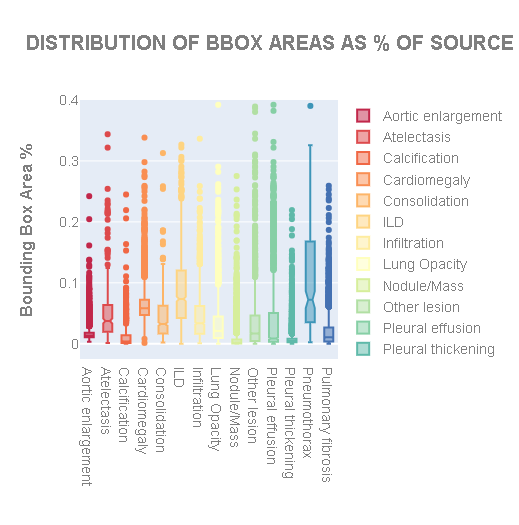

BOUNDING BOXES의 종횡비와 클래스의 영향 조사

우리는 각 클래스와 관련된 BOUNDING BOXES의 평균 모양 (넓은-좁은(wide-narrow), 정사각형 등)을 이해하고 싶고 이를 위해 미리 그려진 선이 있는 막대 차트를 사용합니다.

아래 표시된 막대 차트에서 다음 정보를 확인할 수 있습니다.

클래스 별 bounding-boxes의 평균 크기는 일반적으로 정사각형에 가깝습니다 (일반적으로 정사각형의 가로 직사각형 크기).
심비대에는 평균적으로 매우 얇은 직사각형의 가로 상자가 있습니다 (평균 너비는 평균 높이보다 ~ 2.9 배 더 큽니다).
흉막 비후는 평균적으로 얇은 직사각형의 가로 상자를 가지고 있습니다 (평균 너비는 평균 높이보다 ~ 1.9 배 더 큽니다).
ILD에는 평균적으로 다소 얇은 직사각형의 수직 상자가 있습니다 (평균 높이가 평균 너비보다 ~ 1.6 배 더 큽니다).

<!--
<b style="text-decoration: underline; font-family: Verdana;">INVESTIGATE THE ASPECT RATIO OF BOUNDING BOXES AND THE IMPACT OF CLASS</b>

We want to understand the average shape (wide-narrow, square, etc.) of the bouning-boxes associated with each class, and to do this we will use a bar chart with some pre-drawn lines.

---

**From the bar chart plotted below we can ascertain the following information:**
* The average size of bounding-boxes by class is usually close to square (usually on the horizontal rectangle size of square).
* <b style="text-decoration: underline;">Cardiomegaly</b> has, on average, very thin, rectangular, <b style="text-decoration: underline;">horizontal boxes</b> (mean width is ~2.9x larger than mean height).
* <b style="text-decoration: underline;">Pleural Thickening</b> has, on average, thin, rectangular, <b style="text-decoration: underline;">horizontal boxes</b> (mean width is ~1.9x larger than mean height).
* <b style="text-decoration: underline;">ILD</b> has, on average, somewhat thin, rectangular, <b style="text-decoration: underline;"> vertical boxes</b> (mean height is ~1.6x larger than mean width)
-->


In [ ]:
# Aspect Ratio is Calculated as Width/Height
bbox_df["aspect_ratio"] = (bbox_df["x_max"]-bbox_df["x_min"])/(bbox_df["y_max"]-bbox_df["y_min"])

# Display average means for each class_id so we can examine the newly created Aspect Ratio Column
display(bbox_df.groupby("class_id").mean())

# Generate the bar plot
fig = px.bar(x=[int_2_str[x] for x in range(14)], y=bbox_df.groupby("class_id").mean()["aspect_ratio"], 
             color=[int_2_str[x] for x in range(14)], opacity=0.85,
             color_discrete_sequence=LABEL_COLORS_WOUT_NO_FINDING, 
             labels={"x":"Class Name", "y":"Aspect Ratio (W/H)"},
             title="<b>Aspect Ratios For Bounding Boxes By Class</b>",)
fig.update_layout(font=FIG_FONT,
                  yaxis_title="<b>Aspect Ratio (W/H)</b>",
                  xaxis_title=None,
                  legend_title_text=None)
fig.add_hline(y=1, line_width=2, line_dash="dot", 
              annotation_font_size=10, 
              annotation_text="<b>SQUARE ASPECT RATIO</b>", 
              annotation_position="bottom left", 
              annotation_font_color="black")
fig.add_hrect(y0=0, y1=0.5, line_width=0, fillcolor="red", opacity=0.125,
              annotation_text="<b>>2:1 VERTICAL RECTANGLE REGION</b>", 
              annotation_position="bottom right", 
              annotation_font_size=10,
              annotation_font_color="red")
fig.add_hrect(y0=2, y1=3.5, line_width=0, fillcolor="green", opacity=0.04,
              annotation_text="<b>>2:1 HORIZONTAL RECTANGLE REGION</b>", 
              annotation_position="top right", 
              annotation_font_size=10,
              annotation_font_color="green")
fig.show()

,x_min,y_min,x_max,y_max,img_height,img_width,frac_x_min,frac_x_max,frac_y_min,frac_y_max,frac_bbox_area,aspect_ratio
class_id,,,,,,,,,,,,
0,1262.947640,757.448338,1571.274225,1099.532812,2829.306479,2494.308852,0.505262,0.629847,0.268225,0.389829,0.016004,0.919162
1,903.379928,726.734767,1438.347670,1362.731183,2887.655914,2541.089606,0.355440,0.566121,0.253957,0.473891,0.053384,1.094238
2,1219.472917,1028.112500,1432.578125,1303.685417,2872.919792,2541.393750,0.478485,0.562324,0.358036,0.453631,0.012405,0.936076
3,890.269394,1480.981021,1961.129722,1875.411093,2802.421964,2479.675880,0.357234,0.792075,0.530675,0.672523,0.062641,2.878940
4,879.832734,967.582734,1360.510791,1552.404676,2891.241007,2536.178058,0.346466,0.537886,0.336459,0.538448,0.044359,0.948068
5,1015.389000,889.004000,1588.900000,1925.599000,2904.455000,2586.617000,0.390552,0.615431,0.305525,0.664106,0.089082,0.637270
6,984.099439,870.377706,1455.623897,1492.323978,2910.223737,2577.663192,0.380056,0.564852,0.299097,0.512928,0.045946,0.897174
7,948.639952,1037.773661,1356.880387,1529.251309,2882.970600,2538.852195,0.372505,0.534505,0.361206,0.531973,0.034255,1.018965
8,1153.891473,1204.681395,1324.701163,1404.732946,2900.806202,2553.120155,0.450568,0.517578,0.415599,0.484919,0.009908,0.992708


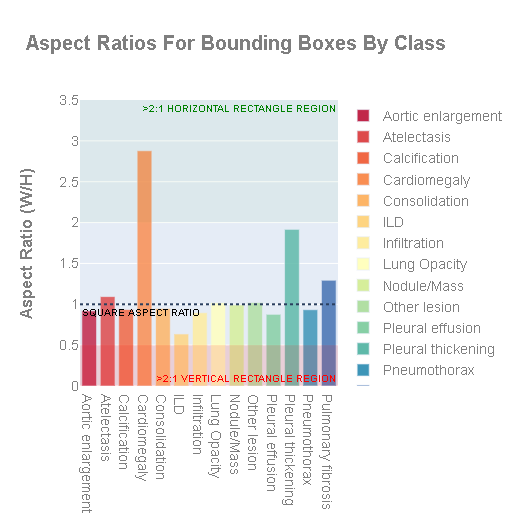